In [2]:
import pandas as pd
from pylab import *
%matplotlib inline

In [3]:
dataDir = "../data"
plotConfig = {
    "uTCACh2":("C0",'^-'), "uTCACh3":("C0",'o--' ), 
    "VMECh2" :("C1",'^-'), "VMECh3" :("C1",'o--' ),
    "uTCACh0":("C2",'^-'), "uTCACh1":("C2",'o--' ),
    "VMECh0" :("C3",'^-'), "VMECh1" :("C3",'o--' )}

# 1. Plot Volage Scan

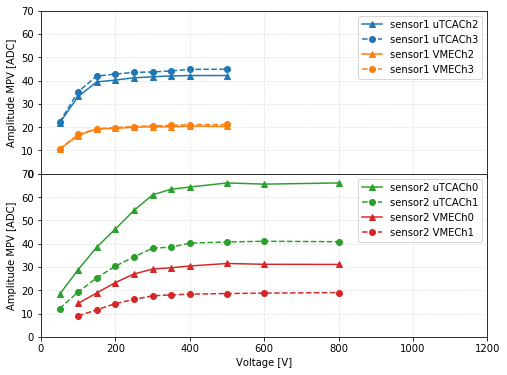

In [4]:
f, (ax1, ax2) = plt.subplots(2,1, sharey=True, facecolor='w',figsize=(8,6))
plt.subplots_adjust(hspace=0)

# sensor1
sensor = "sensor1"
df = pd.read_pickle(dataDir+"/FitPulseAmp/{}.pkl".format(sensor))
for v in ["uTCACh2","uTCACh3","VMECh2","VMECh3"]:
    ax1.plot(df["u"], df[v+'_mpv'], plotConfig[v][1],
             color=plotConfig[v][0],label=sensor + " " + v)
ax1.set_xlim(0,1200)
ax1.set_ylim(0,70)
ax1.legend(loc="upper right")
ax1.grid(linestyle='--',alpha=0.3)
ax1.set_ylabel("Amplitude MPV [ADC]")
ax1.set_xticklabels([])

# sensor2
sensor = "sensor2"
df = pd.read_pickle(dataDir+"/FitPulseAmp/{}.pkl".format(sensor))
for v in ["uTCACh0","uTCACh1","VMECh0","VMECh1"]:
    ax2.plot(df["u"], df[v+'_mpv'], plotConfig[v][1],
             color=plotConfig[v][0],label=sensor + " " + v)
ax2.set_xlim(0,1200)
ax2.set_ylim(0,70)
ax2.legend(loc="upper right")
ax2.grid(linestyle='--',alpha=0.3)
ax2.set_xlabel("Voltage [V]")
ax2.set_ylabel("Amplitude MPV [ADC]")

# save plot
plt.savefig("../plots/effThickness_ADC.png",dpi=300)

# 2. Include Calibration

In [5]:
calibration = pd.read_csv(dataDir+"/Calibration/fitResult.csv")
eleDensity = 78

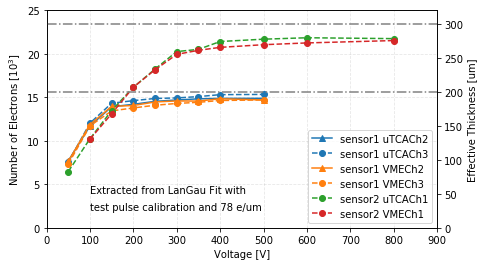

In [6]:

fig, ax1 = plt.subplots(facecolor='w',figsize=(7,4))

# make plot sensor1
sensor = "sensor1"
df = pd.read_pickle(dataDir+"/FitPulseAmp/{}.pkl".format(sensor))
for v in ["uTCACh2","uTCACh3","VMECh2","VMECh3"]:
    k = abs(calibration[v][0]/1000)
    ax1.plot(df["u"], k*df[v+'_mpv'], plotConfig[v][1],
             color=plotConfig[v][0],label=sensor + " " + v)
# make plot sensor2
sensor = "sensor2"
df = pd.read_pickle(dataDir+"/FitPulseAmp/{}.pkl".format(sensor))
for v in ["uTCACh1","VMECh1"]:
    k = abs(calibration[v][0]/1000)
    ax1.plot(df["u"], k*df[v+'_mpv'], plotConfig[v][1],
             color=plotConfig[v][0],label=sensor + " " + v)
# plot setting
ax1.set_xlim(0,900)
ax1.set_ylim(0,25)
ax1.legend(loc="lower right")
ax1.grid(linestyle='--',alpha=0.3)
ax1.set_ylabel(r"Number of Electrons [$10^3$]")
ax1.set_xlabel("Voltage [V]")
ax1.text(100,4,"Extracted from LanGau Fit with")
ax1.text(100,2,"test pulse calibration and {} e/um".format(eleDensity))
ax2 = ax1.twinx()
ax2.set_ylim(0,25000/eleDensity)
ax2.set_ylabel("Effective Thickness [um]")
ax2.axhline(300,linestyle='-.',color='grey')
ax2.axhline(200,linestyle='-.',color='grey')
plt.savefig("../plots/effThickness.png",dpi=300)